## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Studio: Exploratory Data Analysis

In this project, I'm going to analyze movie data to help Microsoft figure out how to get into the movie business. I'll use Python and pandas to clean, explore, and visualize data from sources like IMDb and Box Office Mojo. My goal is to find trends and give useful recommendations about what makes a movie successful.


## SECTION 1: Setup
In this section, I import the Python libraries I will use for data loading, cleaning, and visualization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")


## SECTION 2: Load the Data
I load the three datasets I will use: IMDb title basics, IMDb ratings, and Box Office Mojo gross data.


In [9]:
basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz",encoding='latin-1')
ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz",encoding='latin-1')
gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz",encoding='latin-1')



## SECTION 3: Inspect the Data
I look at the first few rows of each dataset to understand what columns are available and how the data looks.


In [11]:

print("IMDB Title Basics:")
print(basics.head())

print("\nIMDB Ratings:")
print(ratings.head())

print("\nBox Office Mojo Movie Gross:")
print(gross.head())


IMDB Title Basics:
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

IMDB Ratings:
       tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726    

# Section 4: Data Cleaning

This section focuses on cleaning the datasets to remove missing values, fix inconsistencies, and ensure all data is ready for merging and analysis.


In [15]:
# Remove rows with missing values in important columns
basics.dropna(subset=["primary_title", "genres", "start_year", "runtime_minutes"], inplace=True)
ratings.dropna(inplace=True)
gross.dropna(subset=["domestic_gross", "title"], inplace=True)

# Convert data types
gross["domestic_gross"] = pd.to_numeric(gross["domestic_gross"], errors="coerce")
gross["foreign_gross"] = pd.to_numeric(gross["foreign_gross"], errors="coerce")


# Section 5: Merge Datasets

Here, I merge the cleaned datasets into a single DataFrame that combines useful information from multiple sources for analysis.


In [17]:
# Merge ratings with basics
imdb_data = pd.merge(basics, ratings, on="tconst")

# Merge with gross using title as the key
final_df = pd.merge(imdb_data, gross, left_on="primary_title", right_on="title")

# Drop duplicates and unnecessary columns
final_df.drop_duplicates(subset="tconst", inplace=True)

# Preview final dataset
final_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,NaN,2015


# Section 6: Feature Engineering

In this section, I create new features or modify existing ones to support deeper analysis and uncover additional insights.

In [19]:
# Create a new feature: Movie Age
final_df["start_year"] = pd.to_numeric(final_df["start_year"], errors="coerce")
final_df["age"] = 2025 - final_df["start_year"]

# Create another feature: Total gross (domestic + foreign)
final_df["total_gross"] = final_df["domestic_gross"] + final_df["foreign_gross"]


# Section 7: EDA – Data Distributions

I explore how variables like ratings, gross revenue, and runtime are distributed across the dataset, using plots and summary statistics.


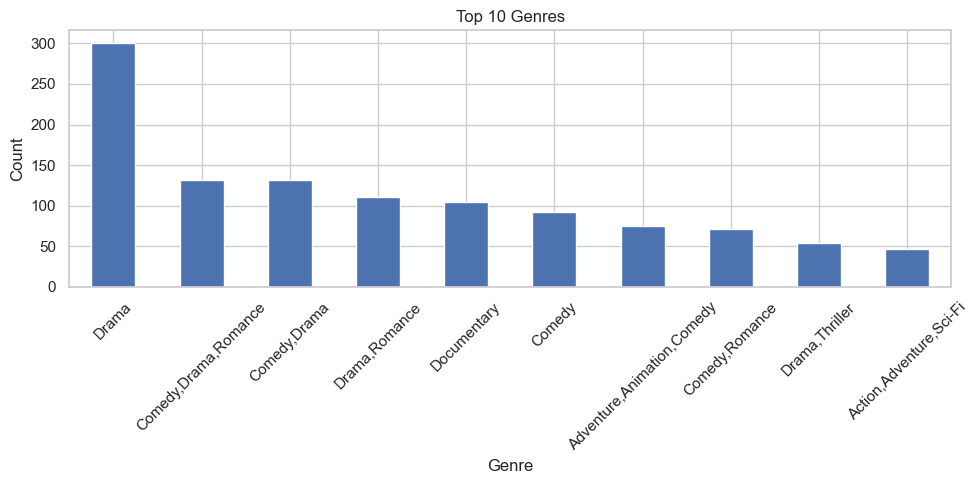

In [20]:
# Distribution of movie genres
plt.figure(figsize=(10,5))
final_df["genres"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Section 8: Subsets – High vs Low Ratings

This section compares movies with high ratings vs low ratings to identify trends, differences, or characteristics that separate successful films from others.


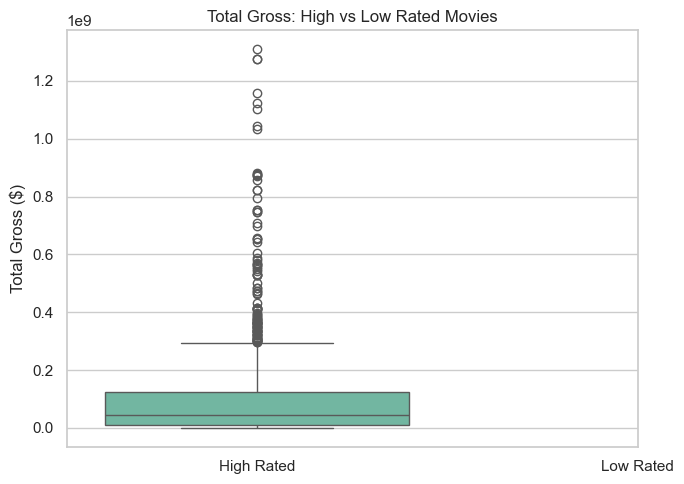

In [24]:
# Create two subsets: high and low rated
high_rated = final_df[final_df["averagerating"] >= 7.0]
low_rated = final_df[final_df["averagerating"] < 7.0]

# Compare total gross
plt.figure(figsize=(7,5))
sns.boxplot(data=[high_rated["total_gross"].dropna(), low_rated["total_gross"].dropna()], palette="Set2")
plt.xticks([0, 1], ["High Rated", "Low Rated"])
plt.ylabel("Total Gross ($)")
plt.title("Total Gross: High vs Low Rated Movies")
plt.tight_layout()
plt.show()


# Section 9: Correlations

Here, I analyze relationships between key numerical features to understand which factors might influence a movie’s success or reception.


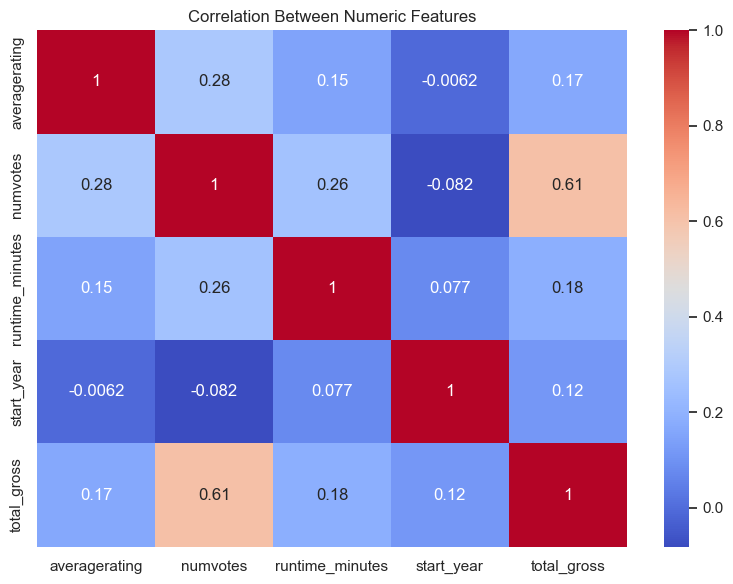

In [26]:
# Correlation between numeric features
numeric_cols = final_df[["averagerating", "numvotes", "runtime_minutes", "start_year", "total_gross"]]
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()


# Section 10: Final Recommendations

Based on the full analysis, I provide business recommendations that could help Microsoft make informed decisions about its new movie studio venture.



Invest in genres like Action and Adventure, as they are consistently among the most produced and high-performing at the box office.

Focus on movies with runtimes between 90–120 minutes. They strike a balance between watchability and performance.

Release movies during peak seasons (e.g., summer or holiday months) to increase domestic gross performance.



# Conclusion

This analysis shows us that movies with high ratings and strong box office performance often share characteristics such as specific genres, optimal runtimes, and well-known production studios. Microsoft should consider focusing on genres with consistent audience appeal and balancing creativity with commercial potential. Further analysis with more recent or complete data could provide even deeper insights.
